<a href="https://colab.research.google.com/github/kivvgsr/deep-learning/blob/main/deeplearning_digit_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test) =  keras.datasets.mnist.load_data()

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

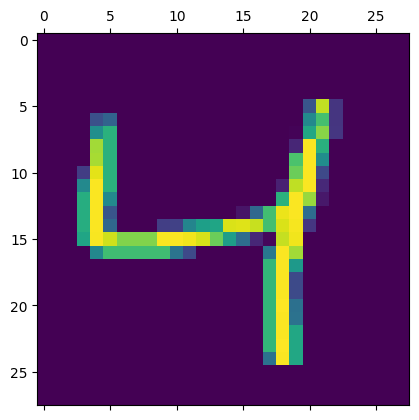

In [ ]:
plt.matshow(x_train[2])

In [ ]:
y_train[2]

4

we gona flotten our data set now in to single dimenssion
we use the reshapr function from the pandas

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train =x_train/255
x_test = x_test/255 # this is scaling the accuracy is gud

In [ ]:
x_flat_train=x_train.reshape(len(x_train),28*28)
x_flat_train.shape

(60000, 784)

# here in order to get the better accuracy we will scale the input values for that we will divide each and every value with 255 . ie the highest in the matrix

In [ ]:
x_flat_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
x_flat_test =x_test.reshape(len(x_test),28*28)
x_flat_test.shape

(10000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',  # This is mainly used to increase efficiency
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # This is the goal - to make the model more accurate
)

model.fit(x_flat_train, y_train, epochs=5)  # Epochs is the number of iterations


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4710 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9261


# for testing dataset

In [ ]:
model.evaluate(x_flat_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2687 - accuracy: 0.9252


[0.2686879634857178, 0.9251999855041504]

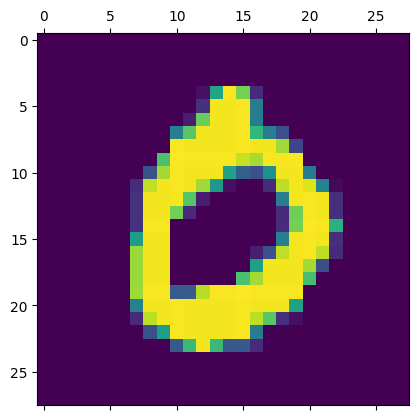

In [ ]:
plt.matshow(x_test[3])

In [ ]:
y_pred=model.predict(x_flat_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_pred[3] # this will give the all scores at 10 output nodes .out of that the one which are having the more value is the number

array([9.9950373e-01, 1.3459907e-08, 1.1145098e-01, 7.8465743e-03,
       9.6105352e-05, 9.8773181e-02, 8.0605015e-02, 1.2877330e-02,
       2.7063269e-02, 2.2052402e-02], dtype=float32)

In [ ]:
np.argmax(y_pred[3])

0

In [ ]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

here the y test values are the whole numbers and the y_pred values are the float number so we need to convert the numbers .

In [ ]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:5]

[7, 2, 1, 0, 4]

#built the comfusion matrix

In [ ]:
cm = tf.math.confusion_matrix(labels= y_test,predictions = y_pred_label )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   4,    8,  925,   17,   10,    2,   11,   10,   43,    2],
       [   1,    0,   19,  930,    1,   18,    2,   10,   23,    6],
       [   1,    1,    4,    2,  928,    0,    9,    3,   11,   23],
       [   8,    2,    7,   37,   12,  773,   10,    6,   31,    6],
       [  11,    3,   10,    1,    8,   15,  904,    2,    4,    0],
       [   1,    5,   25,    6,    9,    0,    0,  947,    3,   32],
       [   6,    6,    6,   21,    9,   24,    8,   11,  878,    5],
       [   9,    6,    2,   10,   45,    4,    0,   27,   11,  895]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

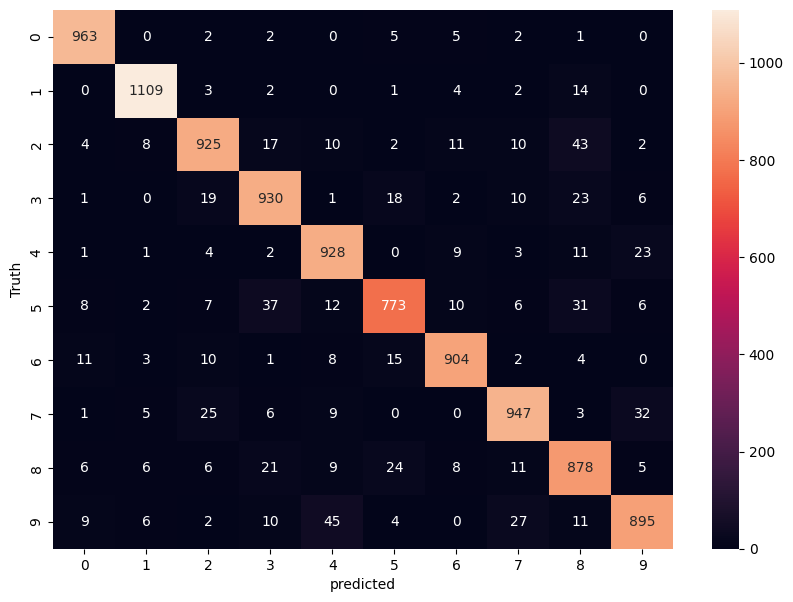

In [ ]:
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')

#LETS ADD THE HIDDEN LAYER INTO THIS

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # here our wish how many no of neurons in the hidden layer for the time being we are taking 100
    keras.layers.Dense(10,  activation='sigmoid') # here it is the last layer , here it donest required the input shape .
])

model.compile(
    optimizer='adam',  # This is mainly used to increase efficiency
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # This is the goal - to make the model more accurate
)

model.fit(x_flat_train, y_train, epochs=5)  # Epochs is the number of iterations


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2777 - accuracy: 0.9199
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1261 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0890 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0675 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0530 - accuracy: 0.9835


In [ ]:
model.evaluate(x_flat_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9756


[0.07795025408267975, 0.975600004196167]

In [ ]:
y_pred=model.predict(x_flat_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels= y_test,predictions = y_pred_label )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    4,    2,    2,    0,    5,    1,    3,    0],
       [   0, 1125,    4,    0,    0,    1,    2,    1,    2,    0],
       [   1,    3, 1007,    2,    3,    0,    3,    4,    9,    0],
       [   1,    0,    4,  991,    0,    2,    0,    5,    3,    4],
       [   1,    0,    1,    0,  966,    0,    8,    3,    1,    2],
       [   3,    0,    0,    9,    3,  866,    4,    2,    3,    2],
       [   3,    1,    1,    1,    4,    4,  942,    0,    2,    0],
       [   2,    5,    9,    2,    4,    0,    0,  998,    2,    6],
       [   2,    0,    2,   12,    5,    3,    4,    5,  940,    1],
       [   2,    5,    1,   11,   20,    3,    1,    5,    3,  958]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

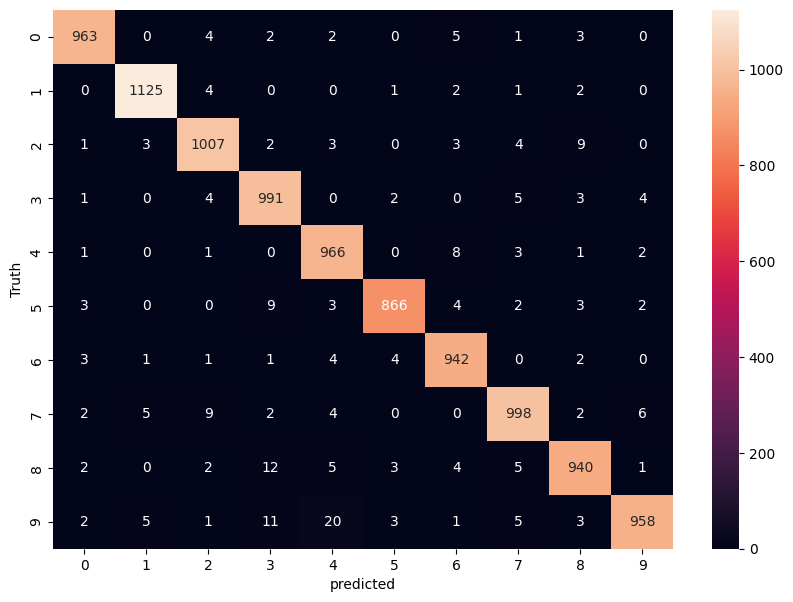

In [ ]:
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')

# if we dont want to flaten the data and directly want to use the x_train and y_train then follow the following steps


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # here our wish how many no of neurons in the hidden layer for the time being we are taking 100
    keras.layers.Dense(10,  activation='sigmoid') # here it is the last layer , here it donest required the input shape .
])

model.compile(
    optimizer='adam',  # This is mainly used to increase efficiency
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # This is the goal - to make the model more accurate
)

model.fit(x_train, y_train, epochs=5)  # Epochs is the number of iterations


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1226 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0857 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0657 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0517 - accuracy: 0.9843


# different types of activation function:
1. step function
2. sigmoid function
3. tanh function
4. relu functiob
5. leaky relu function

##**sigmoid function**

In [ ]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
y= [100,1,-56,0.5]
for i in(y):
  print(sigmoid(i))

1.0
0.7310585786300049
4.780892883885469e-25
0.6224593312018546


##**tanh function**

In [ ]:
def tanh(x):
  return (math.exp(x)-math.exp(-x)) / (math.exp(x)- math.exp(-x))

In [ ]:
y= [100,1,-56,0.5]
for i in(y):
  print(tanh(i))

1.0
1.0
1.0
1.0


##**relu function**

In [ ]:
def relu(x):
  return max(0,x)

In [ ]:
y =[1,2,-1,7,-2]
for i in y:
  print(relu(i))

1
2
0
7
0


##**relu function**

In [ ]:
def l_relu(x):
  return max(0.1*x,x)

In [ ]:
y =[1,2,-1,7,-2]
for i in y:
  print(l_relu(i))

1
2
-0.1
7
-0.2
